In [1]:
!pip install https://github.com/neuropsychology/NeuroKit.py/zipball/master

     | 87.2MB 199.2MB/s
  Stored in directory: /tmp/pip-ephem-wheel-cache-9_uwuq0a/wheels/67/e1/05/20638d7a9bdf264e2b0a9330e7fc04757218fa4934a02fac38
Successfully built neurokit


In [0]:
import neurokit as nk
import pandas as pd
import numpy as np
import seaborn as sns

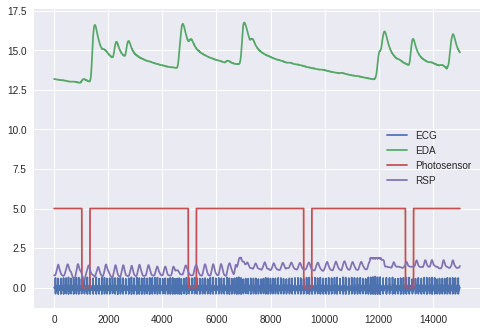

In [3]:
# Download data
df = pd.read_csv("https://raw.githubusercontent.com/neuropsychology/NeuroKit.py/master/examples/Bio/bio_100Hz.csv")
# Plot it
df.plot()

df contains 2.5 minutes of data recorded at 100Hz (2.5 x 60 x 100 = 15000 data points). There are 4 channels, EDA, ECG, RSP and the Photosensor used to localize events. In the present case, there are four events, corresponding to emotionally negative and neutral pictures presented for 3 seconds.

In [4]:
pip install numpy==1.16

# Processing

Biosignals processing can be done quite easily using NeuroKit with the bio_process() function. Simply provide the appropriate biosignal channels and additional channels that you want to keep (for example, the photosensor), and bio_process() will take care of the rest. It will returns a dict containing a dataframe df, including the raw as well as processed signals, and features relevant to each provided signal.

/usr/local/lib/python3.6/dist-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.ar

    Using multitaper spectrum estimation with 7 DPSS windows


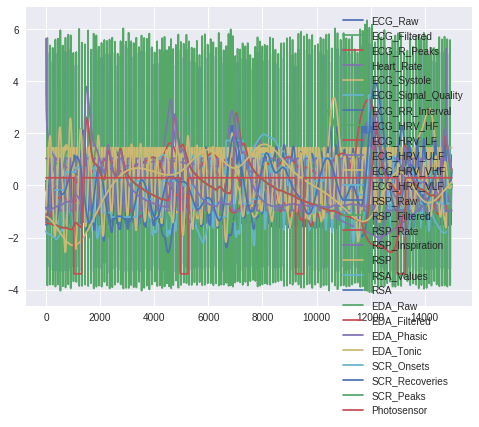

In [5]:
# Process the signals
bio = nk.bio_process(ecg=df["ECG"], rsp=df["RSP"], eda=df["EDA"], add=df["Photosensor"], sampling_rate=100)
# Plot the processed dataframe, normalizing all variables for viewing purpose
nk.z_score(bio["df"]).plot()

Woah, there’s a lot going on there! From 3 variables of interest (ECG, RSP and EDA), bio_process() produced 18 signals. Moreover, the bio dict contains three other dicts, ECG, RSP and EDA containing other features that cannot be simply added in a dataframe. Let’s see what we can do with that.

# Bio Features Extraction


In [7]:
#ECG Signal quality


bio["ECG"]["Average_Signal_Quality"]  # Get average quality



0.6829692001315246

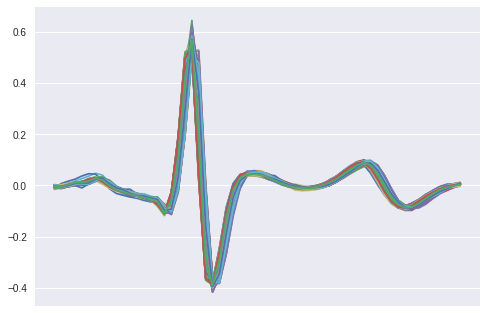

In [8]:
#Heart Beats / Cardiac Cycles


"Let’s take a look at each individual heart beat, synchronized by their R peak. You can plot all of them by doing the following:"


pd.DataFrame(bio["ECG"]["Cardiac_Cycles"]).plot(legend=False)  # Plot all the heart beats


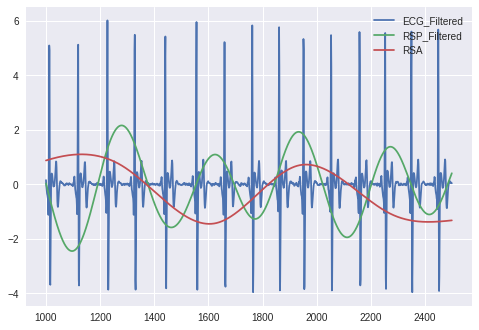

In [9]:
#Respiratory Sinus Arrythmia (RSA)

nk.z_score(bio["df"][["ECG_Filtered", "RSP_Filtered", "RSA"]])[1000:2500].plot()



In [20]:
#Find Events
"First, we must find events onset within our photosensor’s signal using the find_events() function. Specify a cut direction (should it select events that are higher or lower than the treshold)."

events = nk.find_events(df["Photosensor"], cut="lower")
events



{'durations': array([300, 299, 300, 300]),
 'onsets': array([ 1024,  4958,  9224, 12984])}

As we can see, find_events() returns a dict containing onsets and durations for each event. Here, each event lasts for approximately 300 data points (= 3 seconds sampled at 100Hz).

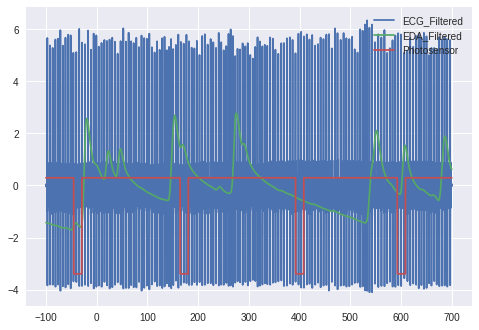

In [22]:
#Create Epochs
"Then, we have to split our dataframe in epochs, i.e. segments of data around the event. We set our epochs to start one second before the event start (onset=-100) and to last for 700 data points, in our case equal to 7 s (since the signal is sampled at 100Hz)."

epochs = nk.create_epochs(bio["df"], events["onsets"], duration=700, onset=-100)
nk.z_score(epochs[0][["ECG_Filtered", "EDA_Filtered", "Photosensor"]]).plot()


